In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [241]:
df=pd.read_csv('st1.csv')
df.head()

,Year,Growth Rate of Person ReID App Market,Average Monthly Spend on Person ReID App Subscriptions per Consumer
0,2017,15.3,4.93
1,2018,20.5,5.88
2,2019,25.7,6.83
3,2020,30.9,7.78
4,2021,36.1,8.73


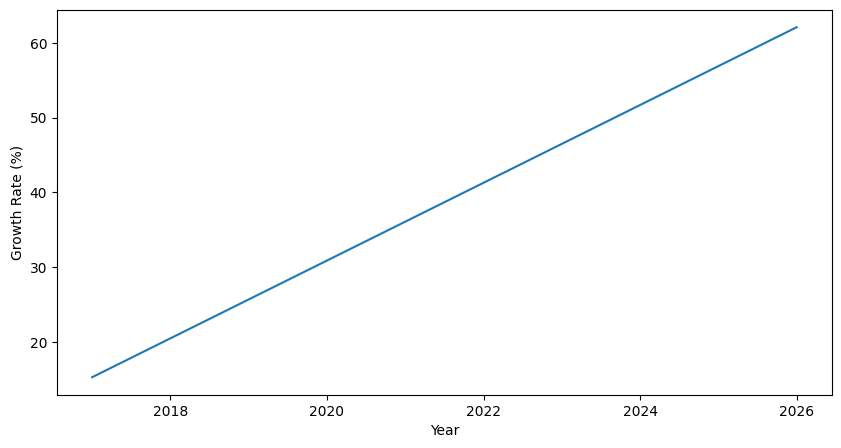

In [242]:
f,axes=plt.subplots(figsize=(10,5))
plt.plot(df['Year'],df['Growth Rate of Person ReID App Market'])
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()

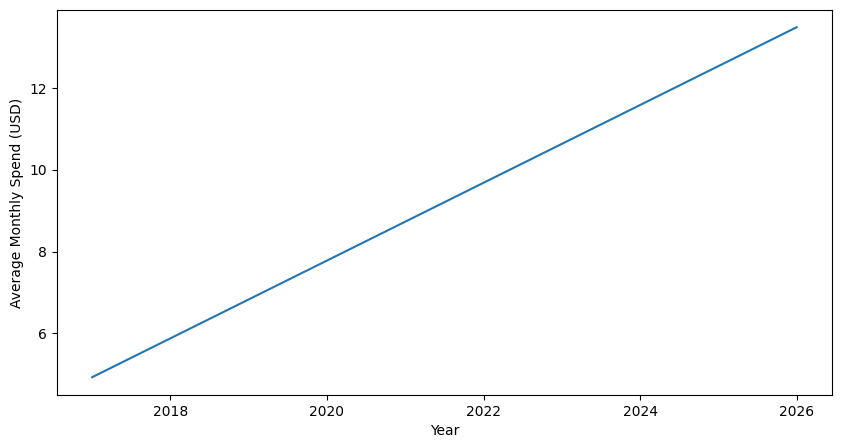

In [243]:
f,axes=plt.subplots(figsize=(10,5))
plt.plot(df['Year'],df['Average Monthly Spend on Person ReID App Subscriptions per Consumer'])
plt.xlabel('Year')
plt.ylabel('Average Monthly Spend (USD)')
plt.show()

In [244]:
def df_to_x_y(df,wn_size):
    df_np=df.to_numpy()
    X=[]
    Y=[]
    for i in range(len(df_np)-wn_size):
        row=[[a] for a in df_np[i:i+2]]
        X.append(row)
        label=df_np[i+2]
        Y.append(label)
    return np.array(X), np.array(Y)

In [245]:
temp=df['Average Monthly Spend on Person ReID App Subscriptions per Consumer']
X,Y=df_to_x_y(temp,2)
X.shape,Y.shape

((8, 2, 1), (8,))

In [246]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [247]:
X_train.shape,Y_train.shape

((5, 2, 1), (5,))

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(InputLayer((2,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                16896     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [249]:
checkp=ModelCheckpoint('model/',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [250]:
model.fit(X_train,Y_train,epochs=400,callbacks=[checkp])

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 78.8344 - root_mean_squared_error: 8.8789
Epoch 2/400
1/1 [==============================] - 0s 8ms/step - loss: 77.9487 - root_mean_squared_error: 8.8289
Epoch 3/400
1/1 [==============================] - 0s 11ms/step - loss: 77.0999 - root_mean_squared_error: 8.7807
Epoch 4/400
1/1 [==============================] - 0s 10ms/step - loss: 76.2455 - root_mean_squared_error: 8.7319
Epoch 5/400
1/1 [==============================] - 0s 15ms/step - loss: 75.4030 - root_mean_squared_error: 8.6835
Epoch 6/400
1/1 [==============================] - 0s 7ms/step - loss: 74.5413 - root_mean_squared_error: 8.6337
Epoch 7/400
1/1 [==============================] - 0s 12ms/step - loss: 73.6806 - root_mean_squared_error: 8.5837
Epoch 8/400
1/1 [==============================] - 0s 6ms/step - loss: 72.8216 - root_mean_squared_error: 8.5336
Epoch 9/400
1/1 [==============================] - 0s 11ms/step - loss: 71.9047 - root_mean_s

1/1 [==============================] - 0s 11ms/step - loss: 45.0652 - root_mean_squared_error: 6.7131
Epoch 30/400
1/1 [==============================] - 0s 13ms/step - loss: 43.5840 - root_mean_squared_error: 6.6018
Epoch 31/400
1/1 [==============================] - 0s 16ms/step - loss: 42.0989 - root_mean_squared_error: 6.4884
Epoch 32/400
1/1 [==============================] - 0s 6ms/step - loss: 40.6112 - root_mean_squared_error: 6.3727
Epoch 33/400
1/1 [==============================] - 0s 14ms/step - loss: 39.1220 - root_mean_squared_error: 6.2548
Epoch 34/400
1/1 [==============================] - 0s 7ms/step - loss: 37.6328 - root_mean_squared_error: 6.1346
Epoch 35/400
1/1 [==============================] - 0s 11ms/step - loss: 36.1449 - root_mean_squared_error: 6.0121
Epoch 36/400
1/1 [==============================] - 0s 7ms/step - loss: 34.6600 - root_mean_squared_error: 5.8873
Epoch 37/400
1/1 [==============================] - 0s 6ms/step - loss: 33.1800 - root_mean_squa

1/1 [==============================] - 0s 6ms/step - loss: 8.3138 - root_mean_squared_error: 2.8834
Epoch 58/400
1/1 [==============================] - 0s 6ms/step - loss: 7.5066 - root_mean_squared_error: 2.7398
Epoch 59/400
1/1 [==============================] - 0s 8ms/step - loss: 6.7469 - root_mean_squared_error: 2.5975
Epoch 60/400
1/1 [==============================] - 0s 7ms/step - loss: 6.0472 - root_mean_squared_error: 2.4591
Epoch 61/400
1/1 [==============================] - 0s 6ms/step - loss: 5.4035 - root_mean_squared_error: 2.3245
Epoch 62/400
1/1 [==============================] - 0s 11ms/step - loss: 4.8153 - root_mean_squared_error: 2.1944
Epoch 63/400
1/1 [==============================] - 0s 6ms/step - loss: 4.2821 - root_mean_squared_error: 2.0693
Epoch 64/400
1/1 [==============================] - 0s 6ms/step - loss: 3.8028 - root_mean_squared_error: 1.9501
Epoch 65/400
1/1 [==============================] - 0s 11ms/step - loss: 3.3760 - root_mean_squared_error: 1

1/1 [==============================] - 0s 6ms/step - loss: 1.3510 - root_mean_squared_error: 1.1623
Epoch 87/400
1/1 [==============================] - 0s 6ms/step - loss: 1.3324 - root_mean_squared_error: 1.1543
Epoch 88/400
1/1 [==============================] - 0s 7ms/step - loss: 1.3168 - root_mean_squared_error: 1.1475
Epoch 89/400
1/1 [==============================] - 0s 7ms/step - loss: 1.3048 - root_mean_squared_error: 1.1423
Epoch 90/400
1/1 [==============================] - 0s 6ms/step - loss: 1.2984 - root_mean_squared_error: 1.1395
Epoch 91/400
1/1 [==============================] - 0s 8ms/step - loss: 1.3009 - root_mean_squared_error: 1.1406
Epoch 92/400
1/1 [==============================] - 0s 8ms/step - loss: 1.2990 - root_mean_squared_error: 1.1397
Epoch 93/400
1/1 [==============================] - 0s 6ms/step - loss: 1.2887 - root_mean_squared_error: 1.1352
Epoch 94/400
1/1 [==============================] - 0s 6ms/step - loss: 1.2746 - root_mean_squared_error: 1.1

1/1 [==============================] - 0s 10ms/step - loss: 1.0763 - root_mean_squared_error: 1.0375
Epoch 115/400
1/1 [==============================] - 0s 6ms/step - loss: 1.0660 - root_mean_squared_error: 1.0325
Epoch 116/400
1/1 [==============================] - 0s 6ms/step - loss: 1.0555 - root_mean_squared_error: 1.0274
Epoch 117/400
1/1 [==============================] - 0s 8ms/step - loss: 1.0451 - root_mean_squared_error: 1.0223
Epoch 118/400
1/1 [==============================] - 0s 8ms/step - loss: 1.0345 - root_mean_squared_error: 1.0171
Epoch 119/400
1/1 [==============================] - 0s 7ms/step - loss: 1.0239 - root_mean_squared_error: 1.0119
Epoch 120/400
1/1 [==============================] - 0s 7ms/step - loss: 1.0132 - root_mean_squared_error: 1.0066
Epoch 121/400
1/1 [==============================] - 0s 10ms/step - loss: 1.0024 - root_mean_squared_error: 1.0012
Epoch 122/400
1/1 [==============================] - 0s 6ms/step - loss: 0.9915 - root_mean_squared_

1/1 [==============================] - 0s 6ms/step - loss: 0.7576 - root_mean_squared_error: 0.8704
Epoch 144/400
1/1 [==============================] - 0s 14ms/step - loss: 0.7463 - root_mean_squared_error: 0.8639
Epoch 145/400
1/1 [==============================] - 0s 5ms/step - loss: 0.7350 - root_mean_squared_error: 0.8573
Epoch 146/400
1/1 [==============================] - 0s 6ms/step - loss: 0.7238 - root_mean_squared_error: 0.8507
Epoch 147/400
1/1 [==============================] - 0s 11ms/step - loss: 0.7125 - root_mean_squared_error: 0.8441
Epoch 148/400
1/1 [==============================] - 0s 6ms/step - loss: 0.7013 - root_mean_squared_error: 0.8374
Epoch 149/400
1/1 [==============================] - 0s 7ms/step - loss: 0.6901 - root_mean_squared_error: 0.8307
Epoch 150/400
1/1 [==============================] - 0s 12ms/step - loss: 0.6789 - root_mean_squared_error: 0.8240
Epoch 151/400
1/1 [==============================] - 0s 6ms/step - loss: 0.6678 - root_mean_squared

1/1 [==============================] - 0s 5ms/step - loss: 0.4589 - root_mean_squared_error: 0.6774
Epoch 172/400
1/1 [==============================] - 0s 9ms/step - loss: 0.4493 - root_mean_squared_error: 0.6703
Epoch 173/400
1/1 [==============================] - 0s 8ms/step - loss: 0.4398 - root_mean_squared_error: 0.6631
Epoch 174/400
1/1 [==============================] - 0s 5ms/step - loss: 0.4303 - root_mean_squared_error: 0.6560
Epoch 175/400
1/1 [==============================] - 0s 12ms/step - loss: 0.4210 - root_mean_squared_error: 0.6489
Epoch 176/400
1/1 [==============================] - 0s 6ms/step - loss: 0.4118 - root_mean_squared_error: 0.6417
Epoch 177/400
1/1 [==============================] - 0s 6ms/step - loss: 0.4027 - root_mean_squared_error: 0.6346
Epoch 178/400
1/1 [==============================] - 0s 16ms/step - loss: 0.3936 - root_mean_squared_error: 0.6274
Epoch 179/400
1/1 [==============================] - 0s 6ms/step - loss: 0.3847 - root_mean_squared_

1/1 [==============================] - 0s 7ms/step - loss: 0.2200 - root_mean_squared_error: 0.4690
Epoch 201/400
1/1 [==============================] - 0s 9ms/step - loss: 0.2134 - root_mean_squared_error: 0.4620
Epoch 202/400
1/1 [==============================] - 0s 7ms/step - loss: 0.2069 - root_mean_squared_error: 0.4549
Epoch 203/400
1/1 [==============================] - 0s 6ms/step - loss: 0.2006 - root_mean_squared_error: 0.4479
Epoch 204/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1944 - root_mean_squared_error: 0.4409
Epoch 205/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1883 - root_mean_squared_error: 0.4339
Epoch 206/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1824 - root_mean_squared_error: 0.4270
Epoch 207/400
1/1 [==============================] - 0s 7ms/step - loss: 0.1765 - root_mean_squared_error: 0.4202
Epoch 208/400
1/1 [==============================] - 0s 6ms/step - loss: 0.1709 - root_mean_squared_er

1/1 [==============================] - 0s 6ms/step - loss: 0.0887 - root_mean_squared_error: 0.2978
Epoch 229/400
1/1 [==============================] - 0s 5ms/step - loss: 0.0859 - root_mean_squared_error: 0.2931
Epoch 230/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0833 - root_mean_squared_error: 0.2886
Epoch 231/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843
Epoch 232/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0784 - root_mean_squared_error: 0.2800
Epoch 233/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0761 - root_mean_squared_error: 0.2758
Epoch 234/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0738 - root_mean_squared_error: 0.2716
Epoch 235/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0716 - root_mean_squared_error: 0.2675
Epoch 236/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0695 - root_mean_squared_er

1/1 [==============================] - 0s 6ms/step - loss: 0.0435 - root_mean_squared_error: 0.2086
Epoch 258/400
1/1 [==============================] - 0s 14ms/step - loss: 0.0428 - root_mean_squared_error: 0.2070
Epoch 259/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0422 - root_mean_squared_error: 0.2055
Epoch 260/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0416 - root_mean_squared_error: 0.2040
Epoch 261/400
1/1 [==============================] - 0s 11ms/step - loss: 0.0411 - root_mean_squared_error: 0.2026
Epoch 262/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0405 - root_mean_squared_error: 0.2013
Epoch 263/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0401 - root_mean_squared_error: 0.2002
Epoch 264/400
1/1 [==============================] - 0s 11ms/step - loss: 0.0396 - root_mean_squared_error: 0.1990
Epoch 265/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0392 - root_mean_squared

1/1 [==============================] - 0s 6ms/step - loss: 0.0336 - root_mean_squared_error: 0.1834
Epoch 286/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0335 - root_mean_squared_error: 0.1829
Epoch 287/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0333 - root_mean_squared_error: 0.1825
Epoch 288/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0331 - root_mean_squared_error: 0.1820
Epoch 289/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0330 - root_mean_squared_error: 0.1815
Epoch 290/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0328 - root_mean_squared_error: 0.1811
Epoch 291/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0326 - root_mean_squared_error: 0.1806
Epoch 292/400
1/1 [==============================] - 0s 5ms/step - loss: 0.0325 - root_mean_squared_error: 0.1802
Epoch 293/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0323 - root_mean_squared_er

1/1 [==============================] - 0s 6ms/step - loss: 0.0296 - root_mean_squared_error: 0.1721
Epoch 315/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0295 - root_mean_squared_error: 0.1718
Epoch 316/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0294 - root_mean_squared_error: 0.1716
Epoch 317/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0293 - root_mean_squared_error: 0.1713
Epoch 318/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0292 - root_mean_squared_error: 0.1709
Epoch 319/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0291 - root_mean_squared_error: 0.1705
Epoch 320/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0289 - root_mean_squared_error: 0.1701
Epoch 321/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0288 - root_mean_squared_error: 0.1699
Epoch 322/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0288 - root_mean_squared_er

1/1 [==============================] - 0s 9ms/step - loss: 0.0267 - root_mean_squared_error: 0.1633
Epoch 343/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0266 - root_mean_squared_error: 0.1630
Epoch 344/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627
Epoch 345/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625
Epoch 346/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0263 - root_mean_squared_error: 0.1621
Epoch 347/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0262 - root_mean_squared_error: 0.1619
Epoch 348/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0261 - root_mean_squared_error: 0.1616
Epoch 349/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0260 - root_mean_squared_error: 0.1613
Epoch 350/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0259 - root_mean_squared_er

1/1 [==============================] - 0s 7ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552
Epoch 372/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0240 - root_mean_squared_error: 0.1548
Epoch 373/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0239 - root_mean_squared_error: 0.1546
Epoch 374/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0239 - root_mean_squared_error: 0.1544
Epoch 375/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542
Epoch 376/400
1/1 [==============================] - 0s 7ms/step - loss: 0.0237 - root_mean_squared_error: 0.1538
Epoch 377/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0236 - root_mean_squared_error: 0.1535
Epoch 378/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0235 - root_mean_squared_error: 0.1532
Epoch 379/400
1/1 [==============================] - 0s 6ms/step - loss: 0.0234 - root_mean_squared_er

1/1 [==============================] - 0s 7ms/step - loss: 0.0218 - root_mean_squared_error: 0.1476
Epoch 400/400
1/1 [==============================] - 0s 5ms/step - loss: 0.0217 - root_mean_squared_error: 0.1473


In [251]:
model.save('model/Prediction.h5')

In [252]:
from tensorflow.keras.models import load_model
model=load_model('model/Prediction.h5')

In [253]:
ar=[2025,2022,2020,2019,2021]
tr_pred=model.predict(X_train).flatten()
tr_results=pd.DataFrame(data={'Train Predictions':tr_pred,'Actuals':Y_train,'Year':ar})
tr_results

,Train Predictions,Actuals,Year
0,12.387143,12.53,2025
1,9.855371,9.68,2022
2,7.783699,7.78,2020
3,6.629440,6.83,2019
4,8.859170,8.73,2021


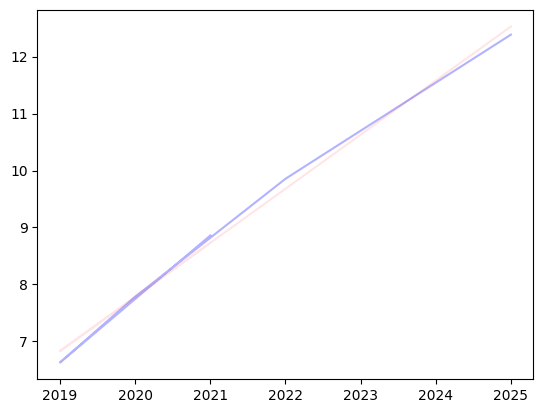

In [256]:

plt.plot(tr_results['Year'],tr_results['Train Predictions'],color='b',alpha=0.3)
plt.plot(tr_results['Year'],tr_results['Actuals'],color='r',alpha=0.1)

In [257]:
arr=[2024,2026,2023]
te_pred1=model.predict(X_test).flatten()
te_results1=pd.DataFrame(data={'Test Predictions':te_pred1,'Actuals':Y_test,'Year':arr})
te_results1

,Test Predictions,Actuals,Year
0,11.618097,11.58,2024
1,12.920755,13.48,2026
2,10.774405,10.63,2023


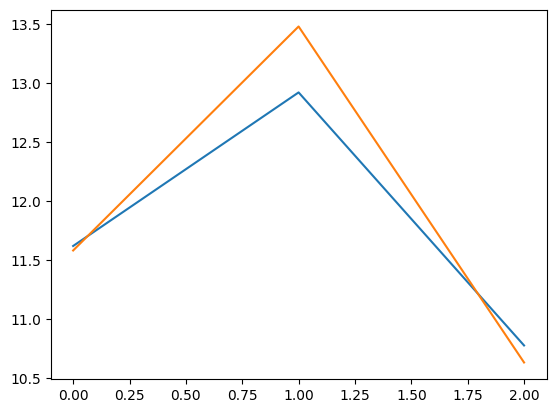

In [258]:
# Graph plotted index-wise
plt.plot(te_results1['Test Predictions'])
plt.plot(te_results1['Actuals'])